# Lab 2: Linear Regression


This lab explores linear regression for modeling relationships between variables. Using the `Advertising`, `Auto`, and `Credit` datasets and `statsmodels` and `scikit-learn` libraries, we'll carry out:

- Simple & multiple linear regression
- Interaction between terms
- Model evaluation (in-sample & out-of-sample R-squared)
- Non-linear relationships (polynomial regression)

Let's begin by importing some libraries we'll need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression

%matplotlib inline

## Load and Explore the `Advertising.csv` Dataset


In the first exercise we'll use the Advertising.csv dataset. It has sales data from 200 markets, alongside advertising budgets for three media types: TV, radio, and newspaper. The variables are:

1. `TV`: Advertising budget for Television.
1. `Radio`: Advertising budget for Radio.
1. `Newspaper`: Advertising budget for Newspaper
1. `Sales`: Product sales in different markets (target).

We'll use the `Sales` as outcome and the rest as the input variables. The goal is to understand how sales changes with advertisement spend across channels.

All datasets for the course are available at `Slides/Data` in course folder. Download/upload all of them to your `Colab Notebooks/BA810/Data/` folder in your Google Drive.

There are two ways to load one of the datasets into your colab workspace.

**Slow and independent approach**

Then mount and set the data folder to a string so that we can easily use it in code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/MyDrive/Colab Notebooks/BA810/Data/'
file_name = data_folder+'Advertising.csv'

MessageError: Error: credential propagation was unsuccessful

Running the above block will ask you for permission to let colab access your files on google drive. Unfortunately, it'll have to be granted every session.

**Easy google drive dependent approach**

An alternative that skips downloading/uploading/mounting/granting permission is to use the public URL of the file hosted on google drive. If you right click on the csv file in your browser, then select share/copy link, you'll get the following for Advertising.csv:

https://drive.google.com/file/d/1YLK_UUxUbK9Slj8tI0v1wuwH0fBcLiJs/view?usp=sharing

In this URL the file id is : 1YLK_UUxUbK9Slj8tI0v1wuwH0fBcLiJs

Using this id, we can construct an url from which pandas can directly read the csv file:

In [ ]:
file_name = 'https://drive.google.com/uc?export=download&id=1YLK_UUxUbK9Slj8tI0v1wuwH0fBcLiJs'

This is simpler, but it only works when the file is publicly shared by google drive.

Once you have set up using either approach, you can read the file using `pandas`:

In [ ]:
advertising = pd.read_csv(file_name, usecols=[1,2,3,4]) # skip the first column (0'th) containing row numbers.
print("What type of data are stored in the columns:")
advertising.info()
print("\nTop 3 rows:")
display(advertising.head(3))
print("\nSummary statistics of each column:")
advertising.describe()

What type of data are stored in the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB

Top 3 rows:


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3



Summary statistics of each column:


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Recall, `Sales` is our outcome variable. `TV`, `Radio`, and `Newspaper` are amount of money spent on advertising in each of those channels. They are going to be the explainatory/independent variables. Conveniently all of them are floats in this dataset.

We often start by checking the pairwise correlation among the variables.

In [ ]:
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


We can check the correlation graphically using a pairplot. In addition to showing scatters of all variable pairs, it shows the histogram of each variable.

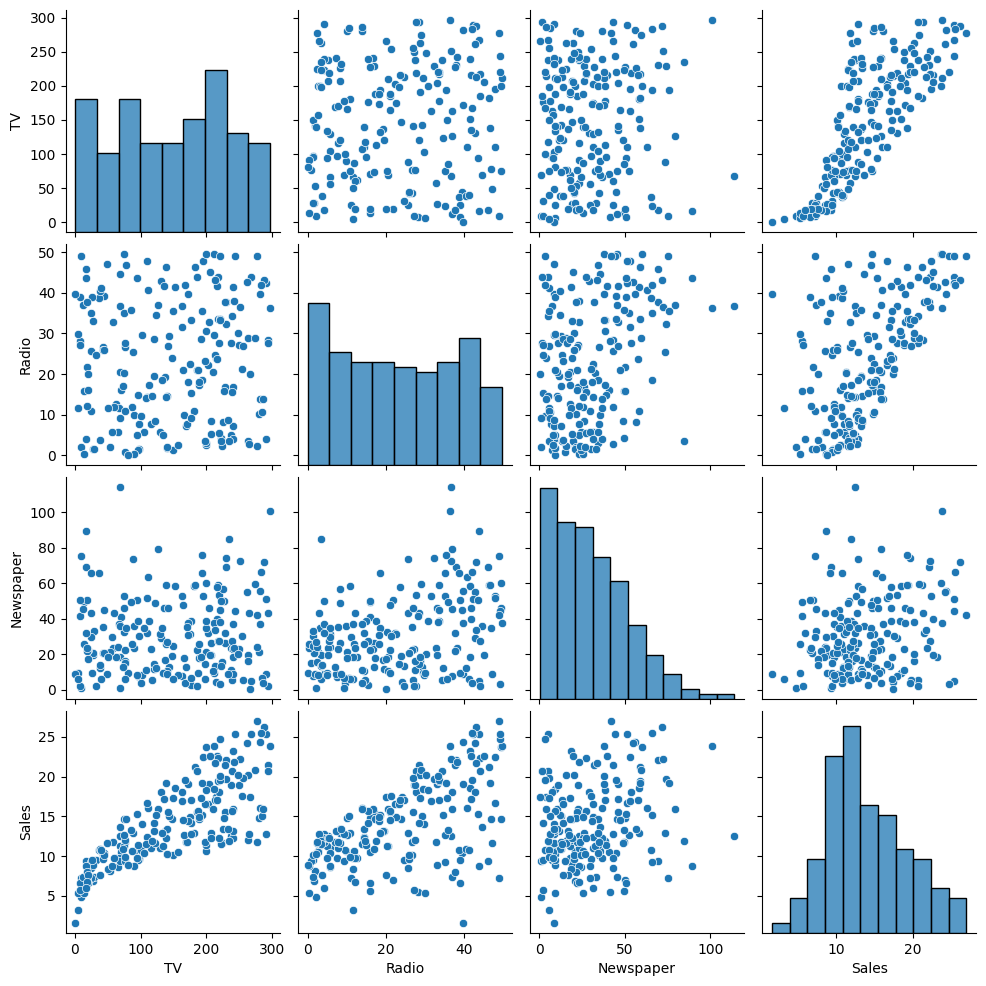

In [ ]:
sns.pairplot(advertising)

The x and y axes of the pair plot are axes of the scatters. The x-axes are also valid for the histograms, but the y-axes don't apply to the histograms. The height of the bars are proportional to the counts, but the raw counts are not shown on any axes.

Now that we have a sense of what's in it, let's fit a simple linear regression, i.e., regress the outcome (`Sales`) on one explanatory variable (`TV`).

First `seaborn` allows you to plot a line fitted to the scatter:

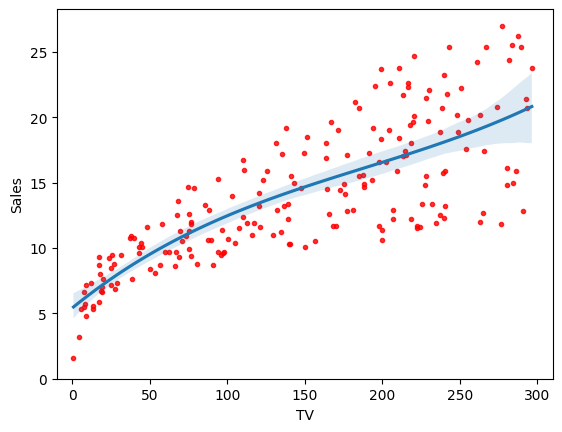

In [ ]:
sns.regplot(x=advertising.TV, y=advertising.Sales, order=3, ci=95, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(ymin=0);

***
**Exercise for later**
Experiment with different polynomial `order` (1-10) and confidence interval band `ci` (50-100) values.
***

## Fit linear regression models


### Fit using `statsmodels`

Let's turn to a package that is particularly suitable for regression analysis. Often regression models are formulated using equations. `statsmodels` offers many facilities that make it easy to specify regression equations and analyzing the results after estimation.

A simple regression that "regresses Sales on TV" can be specified as follows using the `statsmodels` package:

In [ ]:
import statsmodels.formula.api as smf

est = smf.ols('Sales ~ TV', advertising).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        14:58:37   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.0

Let's regress Sales on all of them jointly (multiple linear regression) to account for the effects of any simultaneous advertisement in different channels. Again `statsmodels` makes it easy.

In [ ]:
est = smf.ols('Sales ~ TV + Radio + Newspaper', advertising).fit()
print(est.summary().tables[1])   # printing only the coefficient table

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011


***
**Question**: Are all coefficients statistically significant(ly different from zero)?
***

Now you may suspect that TV and Radio ads complement each other. This is captured with an interaction term, or a column containing product of two variables to capture an additional effect on Sales when both TV and Radio variables are large in a row.

When we interact a continuous variable, they are typically mean centered (mean of the variable subtracted from all values of that variable) first. This allows us to interepret the coefficient on the fixed (not the interaction terms) as the effect of the variable when the rest are held at their means.

In [ ]:
ad_centered = advertising.copy()
features = ['TV', 'Radio', 'Newspaper']
ad_centered[features] = advertising[features] - advertising[features].mean() # center the features
est = smf.ols('Sales ~ TV + Radio + TV*Radio', ad_centered).fit()
  # actually, TV + Radio is unnecessary; adding TV * Radio will include linear terms ('pure effects')
  # in addition to the interactions
print(est.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9470      0.067    208.737      0.000      13.815      14.079
TV             0.0444      0.001     56.673      0.000       0.043       0.046
Radio          0.1886      0.005     41.806      0.000       0.180       0.198
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001


The effect of an additional unit spent on Radio Ad, *when TV ad spent is at its average level* is $0.1886$.

The effect of an additional unit spent on Radio Ad is 0.0011 higher when TV Ad spend increases by 1, or the effect becomes = 0.1886 + 0.0011 = 0.1897.

### A detour into `statsmodels` formula (on your own)
At this point it's worth learning about the capabilities of the powerful `statsmodels`/`patsy` formula interface.

Let's fit a formula looking similar to the one above, but including "only" the interaction:

In [ ]:
est = smf.ols('Sales ~ TV*Radio', advertising).fit()
print(est.summary().tables[1])

The results are identical to the previous one. What just happened? Turns out when we interact two terms `statsmodels` includes all the lower order terms (which is what we typically want to do). In other words when we regressed on `TV*Radio` it actually expanded out `(1+TV)*(1+Radio)`. The coefficient on the `1` is the intercept.

Two include all second order interactions we can group/sum the features in a parenthesis and multiply the sum with itself. The shortcut for doing so is also raising it to the power 2 using the '**' operator.

In [ ]:
est = smf.ols('Sales ~ (TV+Radio+Newspaper)**2', advertising).fit()
print(est.summary().tables[1])

You can make a term out of function calls (np.log below). Using higher order terms require including them in `I()` which protects it from auto-transformation by patsy (the formula processor used by statsmodel).

In [ ]:
est = smf.ols('Sales ~ TV+np.log(1+Radio)+I(Newspaper**2)', advertising).fit()
print(est.summary().tables[1])

Check out [statsmodel user guide](https://www.statsmodels.org/dev/user-guide.html) if you want more.

### Check out-of-sample prediction performance

So, how well does this regression model predict out of sample?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

D_train, D_test = train_test_split(advertising, test_size = .2, random_state=0)
est = smf.ols('Sales ~ TV + Radio + Newspaper', D_train).fit()
print('For "Sales ~ TV + Radio + Newspaper"')
print('in-sample r-square: {:.2f}'.format(est.rsquared))
predictions = est.predict(D_test)
  # if the formula has functions of columns (log or square),
  # the predict function will carry those out on test data automatically
print('out-of-sample r-square: {:.2f}'.format(r2_score(D_test.Sales, predictions)))

For "Sales ~ TV + Radio + Newspaper"
in-sample r-square: 0.91
out-of-sample r-square: 0.86


Let's compare it with the test data $R^2$ from using only TV:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

est = smf.ols('Sales ~ TV', D_train).fit()
predictions = est.predict(D_test)
print('out-of-sample r-square for "Sales ~ TV" : {:.2f}'.format(r2_score(D_test.Sales, predictions)))

out-of-sample r-square for "Sales ~ TV" : 0.68


Full model's out-of-sample $R^2$ is substantially better than what we got using only TV advertising.

## Non-linear relationships

In the following example we'll analyze an Automotive dataset.
Specifically given various features of car we'll predict its gas mileage. We pay extra attention to relationship between (horse)power of the car and it's gas mileage and consider the possibility that they may have a nonlinear relationship.


Here are the brief descriptions of the columns.


1. `cylinders`: Number of cylinders between 4 and 8
1. `displacement`: Engine displacement (cu. inches)
1. `horsepower`: Engine horsepower
1. `weight`: Vehicle weight (lbs.)
1. `acceleration`: Time to accelerate from 0 to 60 mph (sec.)
1. `year`: Model year (modulo 100)
1. `origin`: Origin of car (1. American, 2. European, 3. Japanese)
1. `name`: Vehicle name
1. `mpg`: miles per gallon (target)

I have converted the shared link for the `Auto.csv` file to a format that `pandas` can directly read.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

auto = pd.read_csv('https://drive.google.com/uc?export=download&id=1YFCkxkhLrrza91DglMbev1RKlZ3J1b12', na_values='?').dropna()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


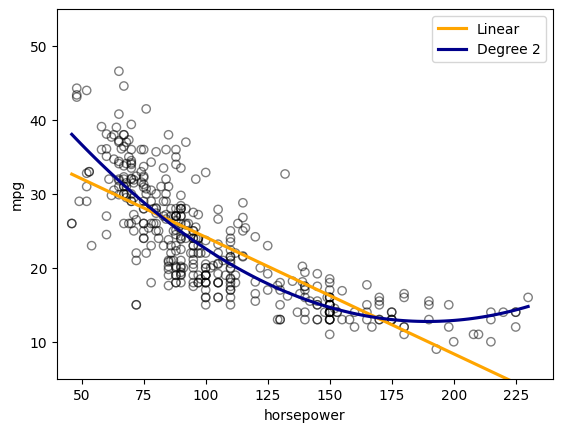

In [ ]:
# With Seaborn's regplot() you can easily plot higher order polynomials.
plt.scatter(x = auto.horsepower, y = auto.mpg, facecolors='None', edgecolors='k', alpha=.5)
sns.regplot(x = auto.horsepower, y = auto.mpg, ci=None, label='Linear', scatter=False, color='orange')
sns.regplot(x = auto.horsepower, y = auto.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='darkblue')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);

The dark blue line suggests taht mpg drops with horsepower for lower horsepowers, but the rate of decrease decreases. Let's confirm this regressing mpg on horsepower with a quadratic term.

In [ ]:
est = smf.ols('mpg ~ horsepower + I(horsepower**2)', auto).fit()
print(est.summary().tables[1])

                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1.800     31.604      0.000      53.360      60.440
horsepower            -0.4662      0.031    -14.978      0.000      -0.527      -0.405
I(horsepower ** 2)     0.0012      0.000     10.080      0.000       0.001       0.001


###Exercise
Can you calculate from the above coefficients the horsepower with the lowest mpg?


####Answer (do not open before you try)


The above equation is equivalent to

$ mpg = 56.9001 - 0.4662 x + 0.0012 x^2$

Take derivative of the right hand side with respect to $x$ and set to 0:

$ - 0.4662 + 2 * 0.0012 x = 0 $
$\Rightarrow x = 0.4662 / (2 * 0.0012) = 194.25$

Looks about at the lowest point of the dark blue curve in the previous plot.

## Exercise: Predict Credit Card Balance

The [Credit.csv](https://rdrr.io/cran/ISLR/man/Credit.html) dataset contains data on 10,000 customers to predict credit card debt levels. It has 10 features and the 11th column (Balance) is the target.

1. `Income`: Individual income reported in **thousands** of dollars.
1. `Limit`: The credit limit for each individual.
1. `Rating`: Credit rating of the individual.
1. `Cards`: The number of credit cards owned by the individual.
1. `Age`: Age of the individual in years.
1. `Education`: Number of years of education completed by the individual.
1. `Gender`: Gender of the individual, categorized as Male or Female.
1. `Student`: Indicates whether the individual is a student (Yes or No).
1. `Married`: Indicates whether the individual is married (Yes or No).
1. `Ethnicity`: Ethnic background of the individual, categorized as African American, Asian, or Caucasian.
1. `Balance`: The average balance on the credit cards in dollars (*not in thousands*) (target).


***
### **Exercise**

Let's examing the association between various attributes and the credit card balance in the `Credit` dataset.
1. Examine the data: columns, correlations, pair-plots, etc.
2. Regress `Balance` on `Income`, `Rating`, `Cards`, `Age`, and `Education`. Are all coefficient significant at p-value of 0.05?
3. Compare the in-sample and out-of-sample $R^2$ of this model. Divide the data into training and test set. Then measure in-sample $R^2$ (using former) and out-of-sample $R^2$ (using latter).
4. Regress `Balance` on `Income` and `Student` status and describe how `Balance` changes with these two covariates?
5. Regress `Balance` on `Income` and `Student` status, now adding the interaction between the two variables. How does `Balance` change with `Income` for students and for non-students?
***

In [ ]:
import pandas as pd

credit = pd.read_csv("Credit.csv")
credit.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


Correlation Matrix:


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


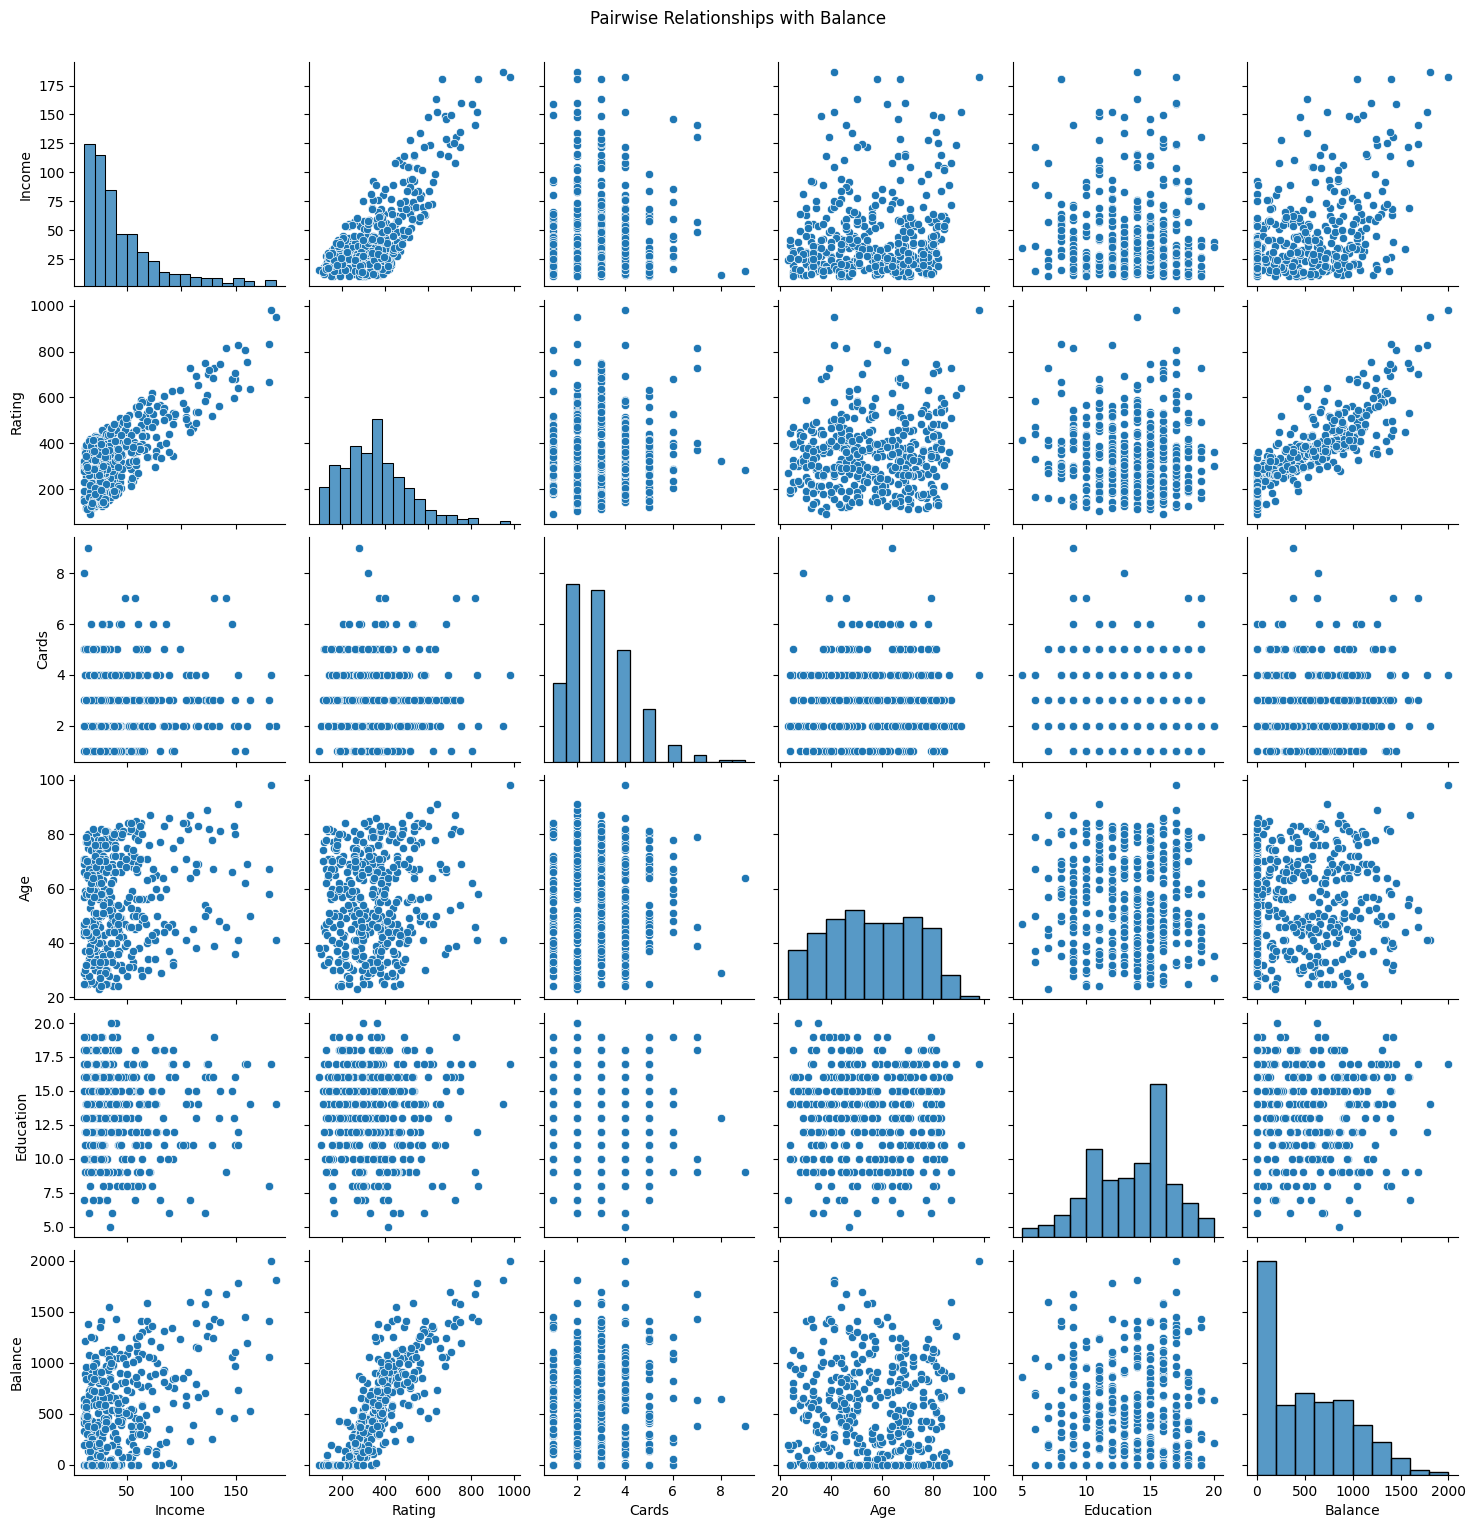

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display summary statistics
display(credit.describe())

# Compute correlation matrix among numerical features
corr = credit.corr(numeric_only=True)
print("Correlation Matrix:")
display(corr)

# Pairplot among key numeric variables
sns.pairplot(credit, vars=["Income", "Rating", "Cards", "Age", "Education", "Balance"])
plt.suptitle("Pairwise Relationships with Balance", y=1.02)
plt.show()


In [ ]:
import statsmodels.formula.api as smf

model1 = smf.ols('Balance ~ Income + Rating + Cards + Age + Education', data=credit).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     559.3
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          1.97e-176
Time:                        15:46:10   Log-Likelihood:                -2601.1
No. Observations:                 400   AIC:                             5214.
Df Residuals:                     394   BIC:                             5238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -525.9183     51.522    -10.208      0.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Split data into 80% train and 20% test
D_train, D_test = train_test_split(credit, test_size=0.2, random_state=42)

# Fit model on training data
est = smf.ols('Balance ~ Income + Rating + Cards + Age + Education', data=D_train).fit()

# In-sample R²
print('In-sample R²: {:.3f}'.format(est.rsquared))

# Out-of-sample R²
pred = est.predict(D_test)
out_r2 = r2_score(D_test['Balance'], pred)
print('Out-of-sample R²: {:.3f}'.format(out_r2))


In-sample R²: 0.885
Out-of-sample R²: 0.828


In [ ]:
model2 = smf.ols('Balance ~ Income + Student', data=credit).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           9.64e-29
Time:                        15:53:37   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        211.1430     32.457      6.

In [ ]:
model3 = smf.ols('Balance ~ Income * Student', data=credit).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                Balance   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     51.30
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.94e-28
Time:                        15:54:25   Log-Likelihood:                -2953.7
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     396   BIC:                             5931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               200.62

## Credit
This notebook is based on the Jupyter notebook for ISL book, Chapter 3, prepared by Jordi Warmenhoven. It's been revised by Nachiketa Sahoo for class BA810. The full set of original notebooks are available at https://github.com/JWarmenhoven/ISLR-python